In [1]:
# Initial attempt to load the USD to RUB (Russian Ruble) exchange rate data from a CSV file using pandas.
# The code includes a try-except block to handle potential errors during the file loading process.
# If successful, it displays the first few rows of the DataFrame to provide a preview of the dataset structure.
# If there's an error, it captures and displays the error message.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly

try:
    df_usd_rub = pd.read_csv('USD_RUB.csv')
    preview = df_usd_rub.head()
except Exception as e:
    preview = str(e)

preview


,Date,Price,Open,High,Low,Change %
0,Apr 14 2022,80.9957,79.8675,82.3836,79.8563,1.41%
1,Apr 13 2022,79.8675,79.6800,80.2965,79.4078,0.24%
2,Apr 12 2022,79.6800,79.0650,80.2549,78.6952,0.78%
3,Apr 11 2022,79.0650,76.0800,81.2950,76.0800,3.92%
4,Apr 08 2022,76.0800,75.7500,76.2590,71.3993,0.44%


In [2]:
# Loading the USD to RUB exchange rate data successfully with additional parameters for better handling of dates.
# 'parse_dates=['Date']' ensures that the 'Date' column is parsed as datetime objects.
# 'index_col='Date'' sets the 'Date' column as the index of the DataFrame for easier time series analysis.
df = pd.read_csv('USD_RUB.csv', parse_dates=['Date'], index_col='Date')


In [5]:
# Checking the first date entry in the DataFrame to verify the datetime parsing and indexing.
# This step is useful for confirming that the 'Date' column is correctly set as the DataFrame index.
df.index[0]


Timestamp('2022-04-14 00:00:00')

             Price         Open         High          Low
count  5320.000000  5320.000000  5320.000000  5320.000000
mean     42.735873    42.717334    42.970833    42.488858
std      18.389728    18.357106    18.649322    18.129008
min      23.156000    23.157000    23.203000    23.052000
25%      29.006800    29.007300    29.041500    28.926875
50%      31.580000    31.576500    31.659000    31.511000
75%      62.367300    62.357875    62.771250    61.972300
max     143.000000   129.000000   158.300000   125.500000


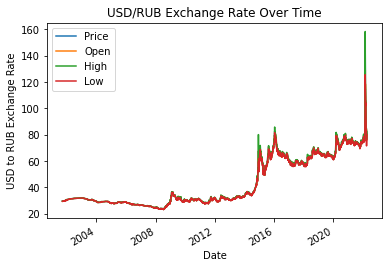

In [3]:
# Displaying basic statistics of the dataset to get an overview of the exchange rate's distribution, mean, etc.
# Plotting the time series data using matplotlib to visualize the trend of USD to RUB exchange rate over time.
# The plot includes labels for the Y-axis and a title for better readability and understanding of the visualized data.
import pandas as pd
import matplotlib.pyplot as plt

print(df.describe())

df.plot()
plt.ylabel('USD to RUB Exchange Rate')
plt.title('USD/RUB Exchange Rate Over Time')
plt.show()


In [5]:
# Performing the Augmented Dickey-Fuller (ADF) test to check the stationarity of the time series data.
# The ADF test is crucial in time series analysis to determine if the data is stationary, which is a common assumption for many time series forecasting methods.
# The output includes the ADF statistic and the p-value. A p-value lower than a threshold (e.g., 0.05) suggests the series is stationary.

result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.362555
p-value: 0.012304


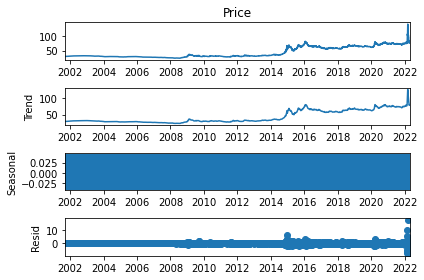

In [11]:
# Handling missing values in the 'Price' column before performing seasonal decomposition.
# Missing values can be filled using forward fill, backward fill, or interpolation methods.
# Forward fill method is chosen here to fill missing values with the previous valid observation.
# After handling missing values, the seasonal decomposition is applied to the 'Price' time series data.
# The decomposition is additive, indicating the observed series is a sum of the trend, seasonal, and random components.
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df['Price'] = df['Price'].fillna(method='ffill')

decomposition = seasonal_decompose(df['Price'], model='additive')
decomposition.plot()
plt.show()


20:07:55 - cmdstanpy - INFO - Chain [1] start processing
20:07:59 - cmdstanpy - INFO - Chain [1] done processing


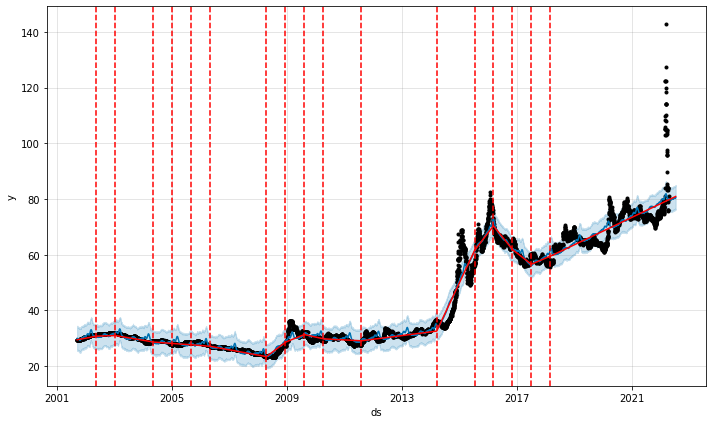

In [13]:
# Using the Prophet library to forecast 'Price' time series data.
# Data preparation includes selecting the relevant columns ('Date' and 'Price') and renaming them as 'ds' and 'y' for Prophet compatibility.
# A Prophet model with daily seasonality enabled is initialized and fitted with the data.
# Future data frame is created for making predictions for the next 90 days.
# The forecast is then plotted, with change points highlighted for better visualization of potential shifts in the trend.

df_prophet = df.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=90)

forecast = model.predict(future)

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()


In [14]:
# Enhancing forecast visualization using Plotly for interactive exploration.
# The forecast and its components (trend, yearly seasonality, etc.) are plotted using Plotly, offering an interactive user experience.
# This allows for a detailed examination of the forecasted values and underlying trends.

fig = plot_plotly(model, forecast)
fig.show()

components_fig = plot_components_plotly(model, forecast)
components_fig.show()


C:\Users\srinivas\AppData\Roaming\Python\Python38\site-packages\plotly\io\_json.py:469: UserWarning:

Discarding nonzero nanoseconds in conversion

